<h1> Simple Vs Multiple Regression</h1> 


---
the main difference between simple regression and multiple regression is the number of independent variables used in the analysis. Simple regression involves a single independent variable, while multiple regression involves two or more independent variables.

---



In [1]:
import pandas as pd 
import numpy as np 

<h3> <Span> In this problem we will use the multiple regression to find the maximum result accuaracy for the give dataset perdictions </span> <h3>


---



<ul style ={"list-type-style:none", font-size:16px}>
  <li >
     Lets see what is database
  </li>
  <li>
  Find out the Target(Output) and features Variables (Inputs)
  </li>
  <li>
  Check the dataset for any null values and Preprocessing
  </li>
      
  <li>
     Do test Train split and Select the  determined features and Targets
  </li>
  <li> 
   Do the Data Visulaization and Select most co-related feature for the target 
  </li>

  <li>
  Apply the multiple reression and check the result 
  </li>


</ul>


---



---



<h1> 1 .Displaying the Head of the Dataset 

In [2]:
data = pd.read_csv("/content/RainTodayData.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,71,88,1008.4,1004.7,7,7,14.6,13.3,1,1
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,87,64,1018.4,1016.8,7,7,3.8,8.5,1,0
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,53,50,1014.2,1010.2,3,1,29.1,30.4,0,0


<h3> 1.2  Chcecking the NULL values 

In [3]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<h3> Checking the data types of the database


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24196 entries, 0 to 24195
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24196 non-null  int64  
 1   Location       24196 non-null  int64  
 2   MinTemp        24196 non-null  float64
 3   MaxTemp        24196 non-null  float64
 4   Rainfall       24196 non-null  float64
 5   Evaporation    24196 non-null  float64
 6   Sunshine       24196 non-null  float64
 7   WindGustDir    24196 non-null  int64  
 8   WindGustSpeed  24196 non-null  int64  
 9   WindDir9am     24196 non-null  int64  
 10  WindDir3pm     24196 non-null  int64  
 11  WindSpeed9am   24196 non-null  int64  
 12  WindSpeed3pm   24196 non-null  int64  
 13  Humidity9am    24196 non-null  int64  
 14  Humidity3pm    24196 non-null  int64  
 15  Pressure9am    24196 non-null  float64
 16  Pressure3pm    24196 non-null  float64
 17  Cloud9am       24196 non-null  int64  
 18  Cloud3

<h3>All the dataset are the integer andd float there are catrerilocial values

<h3>Graphs to check thee outilers 

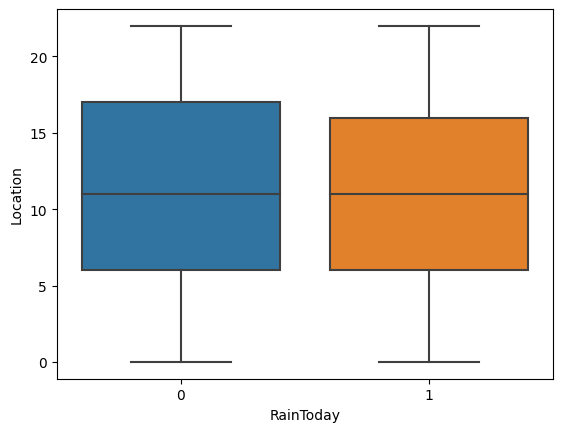

In [24]:
import seaborn as sns
sns.boxplot(x=data['RainToday'],y=data['Location']);

<h3>For all other columns 

<Axes: xlabel='RainToday', ylabel='WindGustSpeed'>

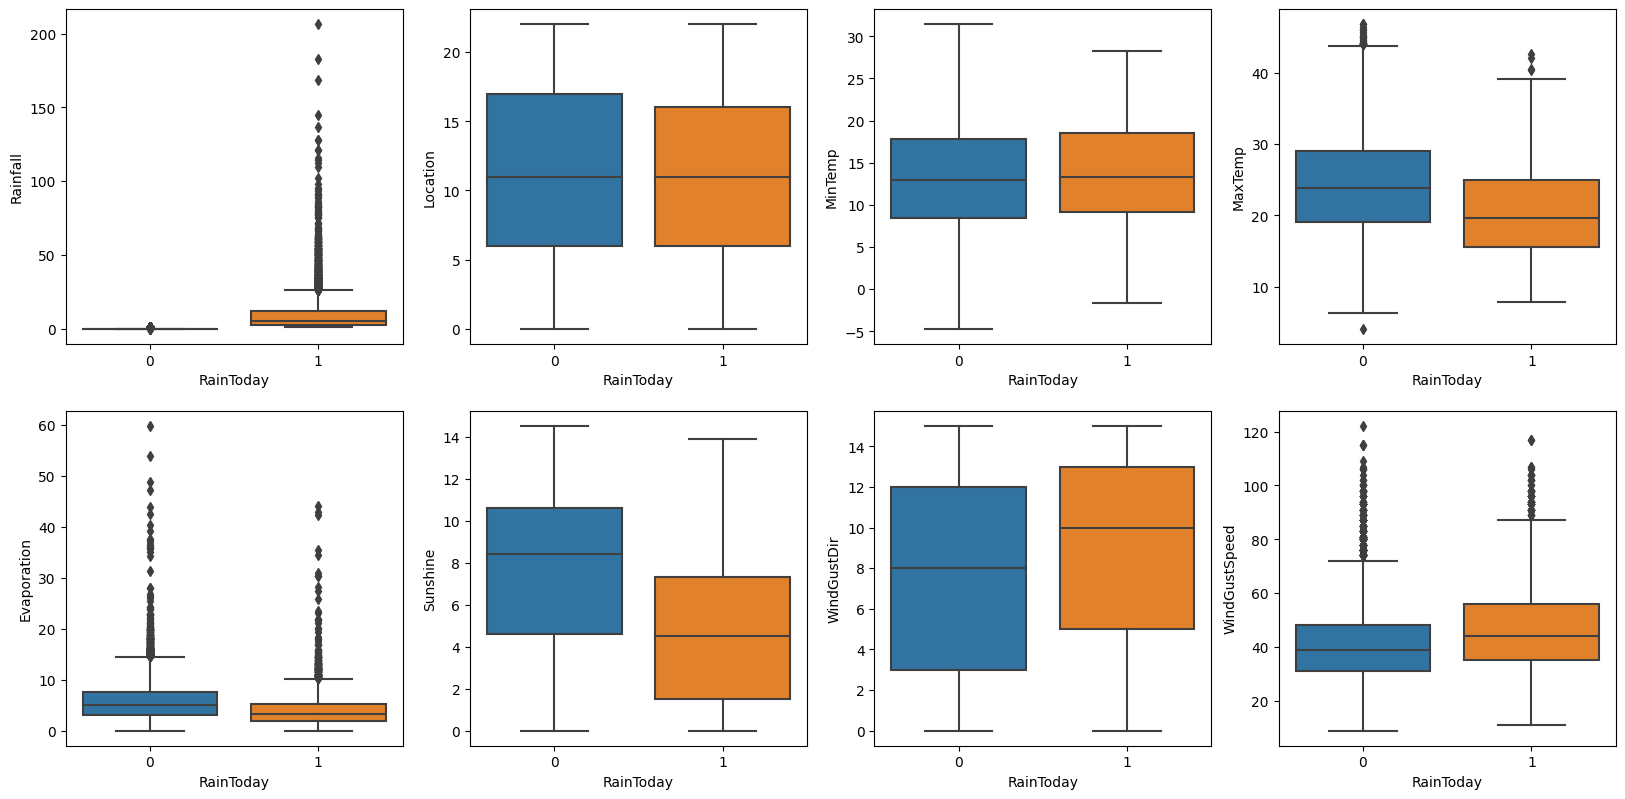

In [25]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.boxplot(x=data['RainToday'],y=data['Rainfall'])
plt.subplot(4,4,2)
sns.boxplot(x=data['RainToday'],y=data['Location'])
plt.subplot(4,4,3)
sns.boxplot(x=data['RainToday'],y=data['MinTemp'])
plt.subplot(4,4,4)
sns.boxplot(x=data['RainToday'],y=data['MaxTemp'])
plt.subplot(4,4,5)
sns.boxplot(x=data['RainToday'],y=data['Evaporation'])
plt.subplot(4,4,6)
sns.boxplot(x=data['RainToday'],y=data['Sunshine'])
plt.subplot(4,4,7)
sns.boxplot(x=data['RainToday'],y=data['WindGustDir'])
plt.subplot(4,4,8)
sns.boxplot(x=data['RainToday'],y=data['WindGustSpeed'])


<h3>Checking the columns and their corealtions

<Axes: >

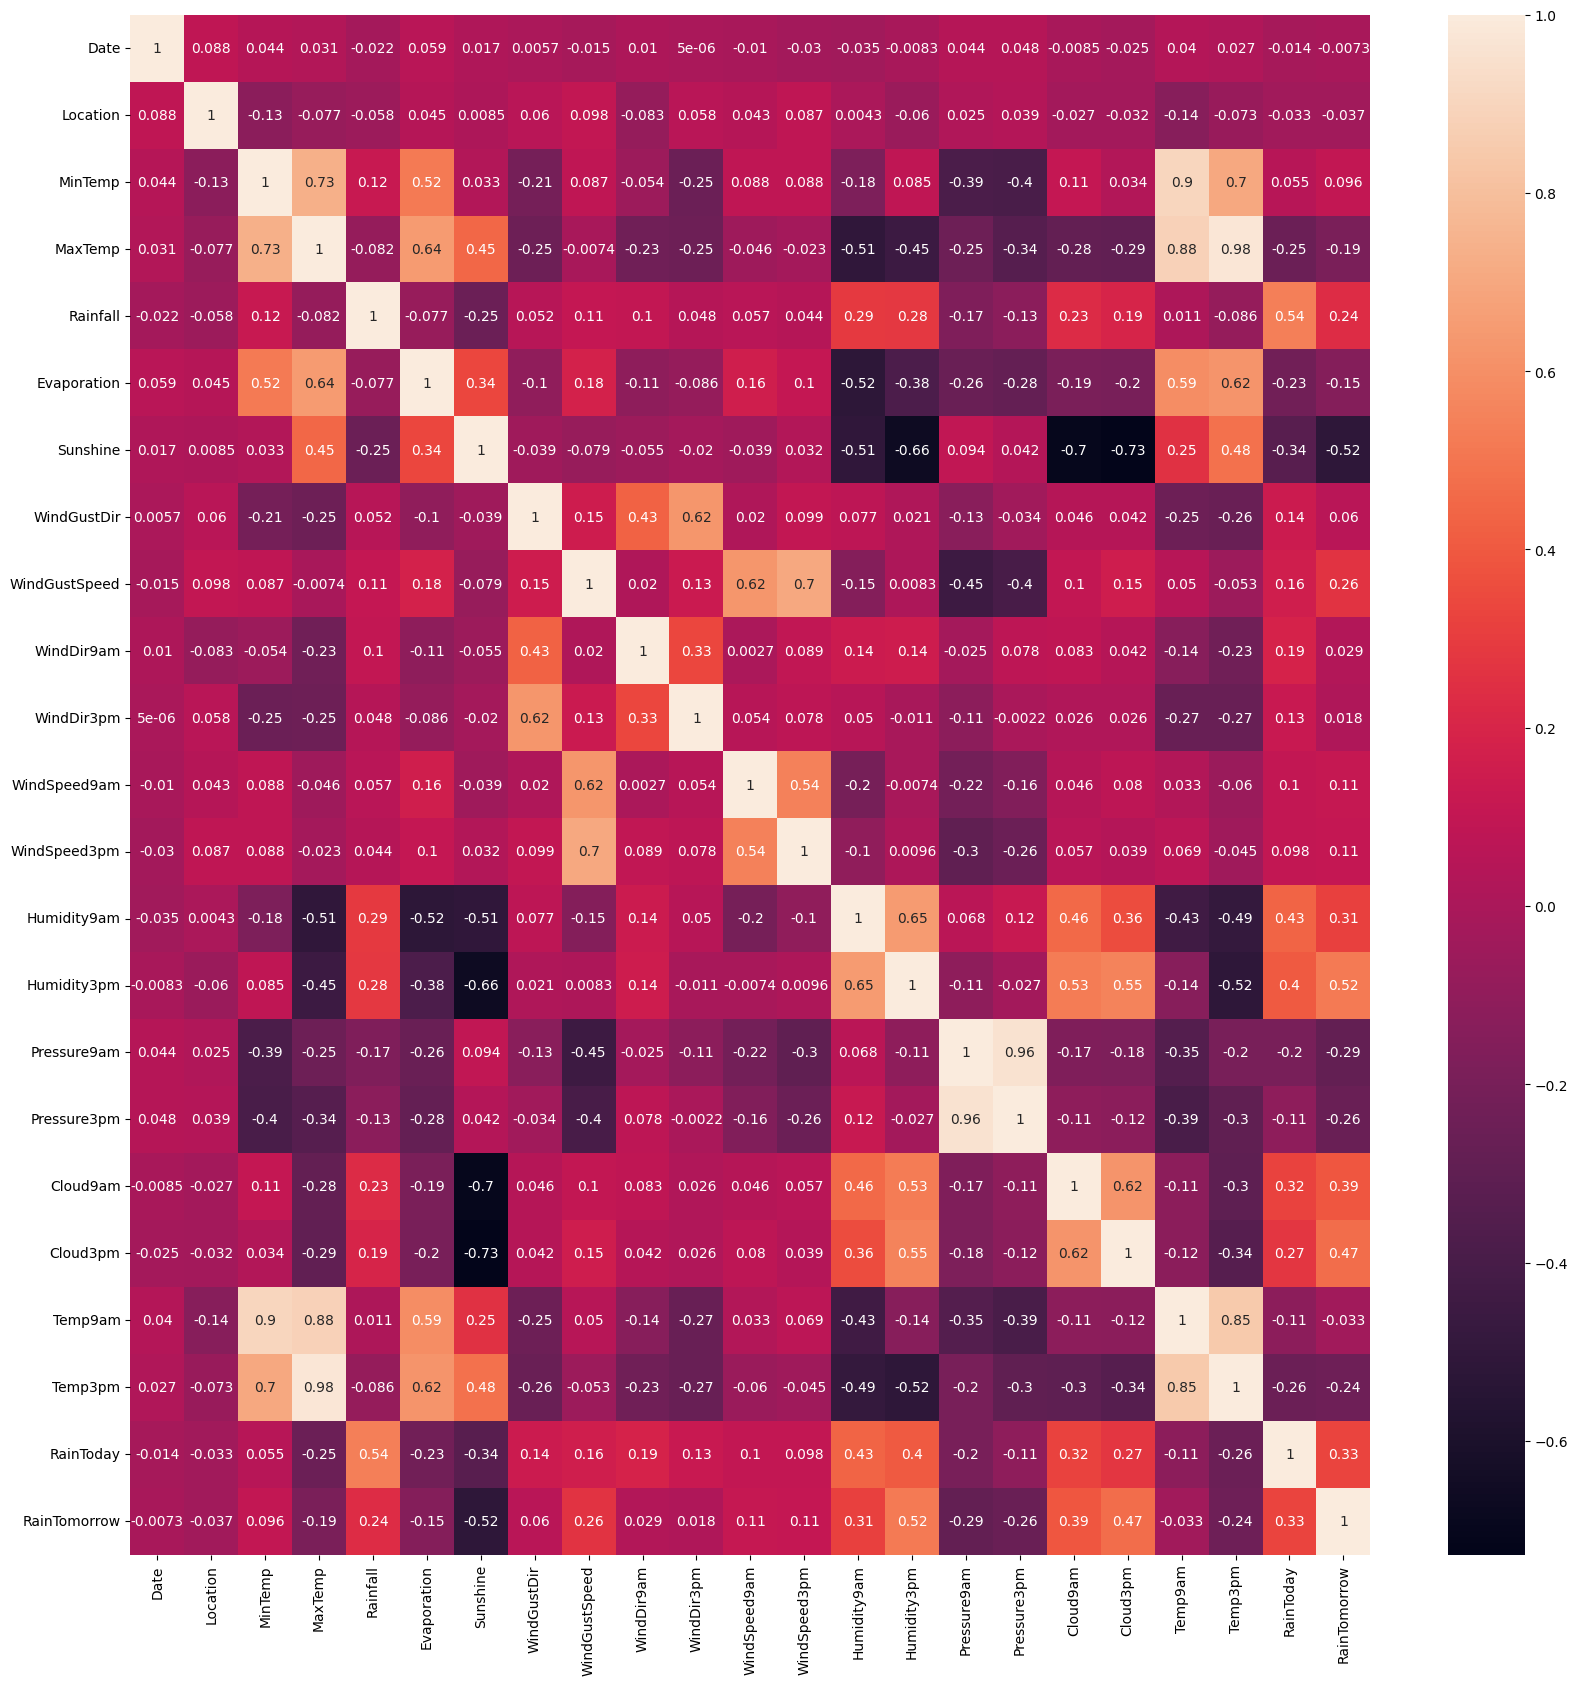

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

<h3> Import the libaries for the train-test_split 

In [27]:
from sklearn.model_selection import train_test_split

In [46]:
X = data[['Rainfall','Humidity9am','Cloud9am']]
y= data['RainToday']  ## Checking for the rain happens today or not 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(X_train)
xtest = sc.fit_transform(X_test)
print(xtrain)

[[-0.24130807  1.10301585  1.17718799]
 [-0.36060292 -0.76282658 -0.28449705]
 [-0.36060292 -1.2716927  -1.38076083]
 ...
 [-0.36060292 -0.4235825  -0.64991831]
 [ 1.07093527  0.59414973  0.08092421]
 [-0.31288498 -0.02779774  0.44634547]]


In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

LogisticRegression(random_state=0)

In [34]:
classifier.score(xtrain,y_train)

0.9902535315526494

In [35]:
classifier.score(xtest,y_test)

0.993613024420789

In [36]:
y_pred = classifier.predict(xtest)

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[5656    0]
 [  51 2278]]


In [38]:

from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.993613024420789


In [39]:
x = [[4.2,87,7]]

In [40]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,71,88,1008.4,1004.7,7,7,14.6,13.3,1,1
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,87,64,1018.4,1016.8,7,7,3.8,8.5,1,0
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,53,50,1014.2,1010.2,3,1,29.1,30.4,0,0


In [41]:
y = classifier.predict(x)
print(y)

[1]


In [42]:
data.iloc[[4]]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,53,50,1014.2,1010.2,3,1,29.1,30.4,0,0


In [43]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
24191,3231,16,20.8,24.4,0.0,7.6,7.9,1,48,4,...,56,56,1019.3,1016.6,5,2,23.0,23.8,0,0
24192,3405,16,10.7,20.1,0.6,1.2,6.4,13,22,13,...,89,69,1027.9,1024.4,2,6,11.9,18.7,0,0
24193,638,17,9.5,21.6,0.0,2.8,4.9,13,28,6,...,72,36,1019.2,1013.8,7,1,12.7,21.1,0,0
24194,987,11,5.5,9.0,0.8,0.8,0.6,8,43,7,...,91,83,1018.4,1017.9,8,8,7.1,7.8,0,1
24195,1143,8,19.5,31.8,0.0,13.4,6.3,4,50,0,...,52,37,1008.0,1006.3,3,5,24.2,30.3,0,0


In [44]:
x = [[0.8,91,8]]
y = classifier.predict(x)
print(y)

[1]


In [45]:
data.iloc[[24194]]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
24194,987,11,5.5,9.0,0.8,0.8,0.6,8,43,7,...,91,83,1018.4,1017.9,8,8,7.1,7.8,0,1
